In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.error_calculator import *
from HW2.regression_generator import generate_regression
from HW2.sgd import sgd, minibatch_gd, gd
from HW2.visualization import visualize_regression_point, visualize_line, draw_levels
from HW2.optimization import *

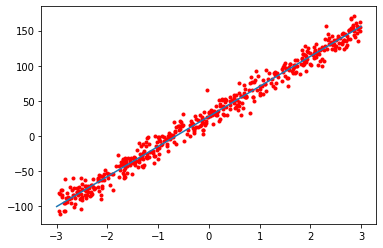

In [2]:
f, points, f_ab = generate_regression(f_scale=50, point_count=500, scale=np.array([3, 10]))

visualize_regression_point(f, points, scale=3)

storage = BenchmarkStorage()

In [3]:
errors = [AbsErrorCalculator(), SquaredErrorCalculator(), BoxErrorCalculator()]
optimizators = [DefaultOptimization(), MomentumOptimization(0.95), NesterovOptimization(0.95), AdaGradOptimization(),
                RMSPropOptimization(0.5), AdamOptimization()]

batch_sizes = [1, 10, 40, len(points)]

result = np.array([])
for error in tqdm(errors, "Errors", position=0):
    for optimizator in tqdm(optimizators, "Optimizations", position=1):
        for batch_size in tqdm(batch_sizes, "Batch sizes", position=2):

            index = storage.add_benchmark_config(batch_size=str(batch_size), optimiser=optimizator, error=error)
            for _ in range(20 if batch_size != len(points) else 1):
                ab, meta = minibatch_gd(points, batch_size=batch_size, error=error,
                                        optimization=optimizator)
                storage.add_benchmark_result(index, meta)
            result = np.append(result, storage.get_benchmark_results_arrayed(index))

result = result.reshape((-1, 8))
df = pd.DataFrame(result, columns=[
    'Config',
    'Mean time',
    'Mean mem',
    'Mean SMAPE',
    'Mean RMSE',
    'Mean logcosh',
    'Mean gradient calls',
    'Mean iterations'
])
df.to_csv("data/2.4_dim2.csv", sep='\t')
df

Errors:   0%|          | 0/3 [00:00<?, ?it/s]

Optimizations:   0%|          | 0/6 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Optimizations:   0%|          | 0/6 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Optimizations:   0%|          | 0/6 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

,Config,Mean time,Mean mem,Mean SMAPE,Mean RMSE,Mean logcosh,Mean gradient calls,Mean iterations
0,"(1, 1, Default(no) optimization, Absolute erro...",0.265577,0.0B,0.128317,10.051935,7.229838,1854.4,1854.4
1,"(10, 1, Default(no) optimization, Absolute err...",0.463931,0.0B,0.129728,9.985436,7.192043,10622.5,1062.25
2,"(40, 1, Default(no) optimization, Absolute err...",1.444157,0.0B,0.12985,9.981083,7.188617,42352.0,1058.8
3,"(500, 1, Default(no) optimization, Absolute er...",15.937956,0.0B,0.129999,9.988686,7.196766,525500.0,1051.0
4,"(1, 1, Momentum optimization (beta=0.95), Abso...",0.157258,0.0B,0.130049,10.03779,7.232884,1070.0,1070.0
...,...,...,...,...,...,...,...,...
67,"(500, 1, RMS prop optimization (gamma=0.5, eps...",6.826241,0.0B,0.125251,9.899258,7.082123,234000.0,468.0
68,"(1, 1, Adam optimization (beta_1=0.9, beta_2=0...",0.150947,0.0B,0.127214,9.940956,7.131122,929.0,929.0
69,"(10, 1, Adam optimization (beta_1=0.9, beta_2=...",0.236934,0.0B,0.1258,9.91125,7.095446,5290.5,529.05
70,"(40, 1, Adam optimization (beta_1=0.9, beta_2=...",0.661548,0.0B,0.125723,9.902421,7.088346,19024.0,475.6


In [6]:
f, points, f_ab = generate_regression(f_scale=50, point_count=500, scale=np.array([3, 3, 10]))

print(f_ab)

storage = BenchmarkStorage()

[ 12.29240945 -13.62489578 -22.8440675 ]


In [7]:
errors = [AbsErrorCalculator(), SquaredErrorCalculator(), BoxErrorCalculator()]
optimizators = [DefaultOptimization(), MomentumOptimization(0.95, dim=3), NesterovOptimization(0.95, dim=3), AdaGradOptimization(dim=3),
                RMSPropOptimization(0.5, dim=3), AdamOptimization(dim=3)]

batch_sizes = [1, 10, 40, len(points)]

result = np.array([])
for error in tqdm(errors, "Errors", position=0):
    for optimizator in tqdm(optimizators, "Optimizations", position=1):
        for batch_size in tqdm(batch_sizes, "Batch sizes", position=2):

            index = storage.add_benchmark_config(batch_size=str(batch_size), optimiser=optimizator, error=error)
            for _ in range(20 if batch_size != len(points) else 1):
                ab, meta = minibatch_gd(points, batch_size=batch_size, error=error,
                                        optimization=optimizator)
                storage.add_benchmark_result(index, meta)
            result = np.append(result, storage.get_benchmark_results_arrayed(index))

result = result.reshape((-1, 8))
df = pd.DataFrame(result, columns=[
    'Config',
    'Mean time',
    'Mean mem',
    'Mean SMAPE',
    'Mean RMSE',
    'Mean logcosh',
    'Mean gradient calls',
    'Mean iterations'
])
df.to_csv("data/2.4_dim3.csv", sep='\t')
df

Errors:   0%|          | 0/3 [00:00<?, ?it/s]

Optimizations:   0%|          | 0/6 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Optimizations:   0%|          | 0/6 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Optimizations:   0%|          | 0/6 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

,Config,Mean time,Mean mem,Mean SMAPE,Mean RMSE,Mean logcosh,Mean gradient calls,Mean iterations
0,"(1, 1, Default(no) optimization, Absolute erro...",0.155411,0.0B,0.228254,9.881799,7.161761,1073.35,1073.35
1,"(10, 1, Default(no) optimization, Absolute err...",0.350965,0.0B,0.238414,10.280123,7.468056,7996.5,799.65
2,"(40, 1, Default(no) optimization, Absolute err...",1.100395,0.0B,0.23917,10.302094,7.484976,31500.0,787.5
3,"(500, 1, Default(no) optimization, Absolute er...",10.933264,0.0B,0.239485,10.310704,7.491668,391500.0,783.0
4,"(1, 1, Momentum optimization (beta=0.95), Abso...",0.1371,0.0B,0.23439,10.097073,7.331131,865.45,865.45
...,...,...,...,...,...,...,...,...
67,"(500, 1, RMS prop optimization (gamma=0.5, eps...",3.897793,0.0B,0.223499,9.649764,6.997728,134500.0,269.0
68,"(1, 1, Adam optimization (beta_1=0.9, beta_2=0...",0.152123,0.0B,0.226902,9.826407,7.127546,966.0,966.0
69,"(10, 1, Adam optimization (beta_1=0.9, beta_2=...",0.191059,0.0B,0.223904,9.695583,7.029344,4261.0,426.1
70,"(40, 1, Adam optimization (beta_1=0.9, beta_2=...",0.439578,0.0B,0.22327,9.672334,7.010937,12574.0,314.35


In [8]:
scale = np.array([10])



In [9]:
result = np.array([])

for i in tqdm(range(20), "dims"):
    scale = np.append([3], scale)
    f, points, f_ab = generate_regression(f_scale=50, point_count=500, scale=scale)
    index = storage.add_benchmark_config(batch_size='sgd_{}'.format(i + 1))
    for _ in range(20):
        ab, meta = sgd(points)
        storage.add_benchmark_result(index, meta)
    result = np.append(result, storage.get_benchmark_results_arrayed(index))
result = result.reshape((-1, 8))

df = pd.DataFrame(result, columns=[
    'Config',
    'Mean time',
    'Mean mem',
    'Mean SMAPE',
    'Mean RMSE',
    'Mean logcosh',
    'Mean gradient calls',
    'Mean iterations'
])
df.to_csv("data/2.4_ndims.csv", sep='\t')
df

dims:   0%|          | 0/20 [00:00<?, ?it/s]

/home/easyhacks/Документы/git/Optimization-Methods-IFMO/HW2/sgd.py:42: RuntimeWarning: overflow encountered in cosh
  np.array(list(map(lambda _point: np.log(np.cosh(scalar(_ab, _point) - _point[-1])), _points))))


,Config,Mean time,Mean mem,Mean SMAPE,Mean RMSE,Mean logcosh,Mean gradient calls,Mean iterations
0,"(sgd_1, 1, Default(no) optimization, Squared e...",0.156104,0.0B,0.364951,10.02358,7.379379,1119.65,1119.65
1,"(sgd_2, 1, Default(no) optimization, Squared e...",0.309202,0.0B,0.116136,10.502983,7.58477,2198.15,2198.15
2,"(sgd_3, 1, Default(no) optimization, Squared e...",0.22763,0.0B,0.118302,10.276483,7.538337,1613.15,1613.15
3,"(sgd_4, 1, Default(no) optimization, Squared e...",0.283767,0.0B,0.110696,10.488656,7.833076,1989.85,1989.85
4,"(sgd_5, 1, Default(no) optimization, Squared e...",0.372461,0.0B,0.129486,11.073249,8.295977,2565.95,2565.95
5,"(sgd_6, 1, Default(no) optimization, Squared e...",0.442665,0.0B,0.094062,11.10729,8.080465,2994.3,2994.3
6,"(sgd_7, 1, Default(no) optimization, Squared e...",0.393043,0.0B,0.18432,22.152685,17.194077,2638.8,2638.8
7,"(sgd_8, 1, Default(no) optimization, Squared e...",0.593684,35.43kB,0.104305,14.819461,11.152373,3878.4,3878.4
8,"(sgd_9, 1, Default(no) optimization, Squared e...",0.399119,0.0B,0.311676,59.877842,47.630725,2624.15,2624.15
9,"(sgd_10, 1, Default(no) optimization, Squared ...",0.169339,0.0B,0.508472,80.235909,63.271421,1148.9,1148.9


In [5]:
f, points, f_ab = generate_regression(f_scale=50, point_count=500, scale=np.array([3, 4, 5, 3, 10]))

print("Real: {}".format(f_ab))

Real: [-49.66156216 -13.4923534  -29.54171417  37.65179465   5.12863733]


In [6]:
w, _ = sgd(points)

print("Sgd: {}".format(w))

Sgd: [-48.61246498 -13.83099864 -29.33534617  36.4470233    4.032787  ]


In [7]:
w, _ = minibatch_gd(points, batch_size=50)
print("Mini-50: {}".format(w))

Mini-50: [-47.63633287 -13.16619135 -29.55637194  35.74261655   2.79923154]


In [8]:
w, _ = gd(points)
print("Gd: {}".format(w))

Gd: [-47.41371071 -13.18818274 -29.5942649   35.34361993   2.88349159]
